<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 1.5 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Group name:</b> # Deep Learning 16  : Marine POULARD & Alaa HOUIMEL
 
 
The aim of this session is to practice with Convolutional Neural Networks. Each group should fill and run appropriate notebook cells. 


Generate your final report (export as HTML) and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed and submitted by May 30th 2018 (23:59:59 CET).

# Introduction

In the previous Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%. Can you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks,  **LeNet-5**, to go to more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell below to load the MNIST data that comes with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [41]:
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

epsilon = 1e-10 # this is a parameter you will use later

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example
**y=softmax(Wx+b)** seen in the first lab. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the TensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
#STEP 1
tf.reset_default_graph()
# Parameters
learning_rate = 0.01
training_epochs = 40
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')

b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    # We use tf.clip_by_value to avoid having too low numbers in the log function
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(tf.clip_by_value(pred, epsilon, 1.0)), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

#STEP 2 

# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size, shuffle=(i==0))
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")
    summary_writer.flush()

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch:  01   =====> Loss= 1.288141048
Epoch:  02   =====> Loss= 0.732556826
Epoch:  03   =====> Loss= 0.600278284
Epoch:  04   =====> Loss= 0.536755747
Epoch:  05   =====> Loss= 0.497860761
Epoch:  06   =====> Loss= 0.471243062
Epoch:  07   =====> Loss= 0.451359253
Epoch:  08   =====> Loss= 0.435659512
Epoch:  09   =====> Loss= 0.423627361
Epoch:  10   =====> Loss= 0.413302623
Epoch:  11   =====> Loss= 0.404483308
Epoch:  12   =====> Loss= 0.396705989
Epoch:  13   =====> Loss= 0.390275187
Epoch:  14   =====> Loss= 0.384356819
Epoch:  15   =====> Loss= 0.379331370
Epoch:  16   =====> Loss= 0.374381768
Epoch:  17   =====> Loss= 0.370381354
Epoch:  18   =====> Loss= 0.366558054
Epoch:  19   =====> Loss= 0.363003287
Epoch:  20   =====> Loss= 0.359734048
Epoch:  21   =====> Loss= 0.356760797
Epoch:  22   =====> Loss= 0.353806734
Epoch:  23   =====> Loss= 0.351072991
Epoch:  24   =====> Loss= 0.348546833
Epoch:  25   =====> Loss= 0.346268926
Epoch:  26   =====> Loss= 0.344262740
Epoch:  27  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Open a Terminal and run the command line **"tensorboard --logdir=lab_2/log_files/"**
- Click on "Tensorboard web interface" in Zoe  


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

You are now more familar with **TensorFlow** and **TensorBoard**. In this section, you are to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

Then, you will make some optimizations to get more than 99% of accuracy.

For more informations, have a look at this list of results: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet-5 </span></center>





The LeNet architecture takes a 28x28xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1 - Convolution (5x5):** The output shape should be 28x28x6. **Activation:** ReLU. **MaxPooling:** The output shape should be 14x14x6.

**Layer 2 - Convolution (5x5):** The output shape should be 10x10x16. **Activation:** ReLU. **MaxPooling:** The output shape should be 5x5x16.

**Flatten:** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use tf.reshape.

**Layer 3 - Fully Connected:** This should have 120 outputs. **Activation:** ReLU.

**Layer 4 - Fully Connected:** This should have 84 outputs. **Activation:** ReLU.

**Layer 5 - Fully Connected:** This should have 10 outputs. **Activation:** softmax.


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [42]:
# Functions for weigths and bias initilization 
def weight_variable(shape,name="Weights"):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial,name=name)

def bias_variable(shape,name="Biases"):
  initial = tf.constant(0., shape=shape)
  return tf.Variable(initial,name=name)

## Configuration of Neural Network

The configuration of the Convolutional Neural Network is defined here for convenience, so you can easily find and change these numbers and re-run the Notebook.

In [43]:
tf.reset_default_graph() # reset the default graph before defining a new model

In [44]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 6         # There are 6 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 16         # There are 36 of these filters.

# Fully-connected layer 1.
fc_size1 = 120            # Number of neurons in fully-connected layer.
    
# Fully-connected layer 2.
fc_size2 = 84            # Number of neurons in fully-connected layer.


In [45]:
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Helper-function for creating a new Convolutional Layer

This function creates a new convolutional layer in the computational graph for TensorFlow. Nothing is actually calculated here, we are just adding the mathematical formulas to the TensorFlow graph.

It is assumed that the input is a 4-dim tensor with the following dimensions:

1. Image number.
2. Y-axis of each image.
3. X-axis of each image.
4. Channels of each image.

Note that the input channels may either be colour-channels, or it may be filter-channels if the input is produced from a previous convolutional layer.

The output is another 4-dim tensor with the following dimensions:

1. Image number, same as input.
2. Y-axis of each image. If 2x2 pooling is used, then the height and width of the input images is divided by 2.
3. X-axis of each image. Ditto.
4. Channels produced by the convolutional filters.

In [46]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   name_weights,
                   name_biases,
                   name_layer,
                   use_pooling =True,
                   use_padding = True): # Use 2x2 max-pooling.  
    with tf.name_scope(name_layer):
        
        # Shape of the filter-weights for the convolution.
        # This format is determined by the TensorFlow API.
        shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights aka. filters with the given shape.
        weights = weight_variable(shape=shape,name=name_weights)
        #weights = tf.identity(weights, name=name_weights)

        # Create new biases, one for each filter.
        biases = bias_variable(shape=[num_filters],name=name_biases)
        #biases = tf.identity(biases, name=name_biases)

        # Create the TensorFlow operation for convolution.
        # Note the strides are set to 1 in all dimensions.
        # The first and last stride must always be 1,
        # because the first is for the image-number and
        # the last is for the input-channel.
        # But e.g. strides=[1, 2, 2, 1] would mean that the filter
        # is moved 2 pixels across the x- and y-axis of the image.
        # The padding is set to 'SAME' which means the input image
        # is padded with zeroes so the size of the output is the same.
        if use_padding :
            layer = tf.nn.conv2d(input=input,
                                 filter=weights,
                                 strides=[1, 1, 1, 1],
                                 padding='SAME')
        else : 
            layer = tf.nn.conv2d(input=input,
                                 filter=weights,
                                 strides=[1, 1, 1, 1],
                                 padding='VALID')

        # Add the biases to the results of the convolution.
        # A bias-value is added to each filter-channel.
        layer += biases

        # Use pooling to down-sample the image resolution?
        if use_pooling:
            # This is 2x2 max-pooling, which means that we
            # consider 2x2 windows and select the largest value
            # in each window. Then we move 2 pixels to the next window.
            layer = tf.nn.max_pool(value=layer,
                                   ksize=[1, 2, 2, 1],
                                   strides=[1, 2, 2, 1],
                                   padding='SAME')

        # Rectified Linear Unit (ReLU).
        # It calculates max(x, 0) for each input pixel x.
        # This adds some non-linearity to the formula and allows us
        # to learn more complicated functions.
        layer = tf.nn.relu(layer,name=name_layer)
        #layer = tf.identity(layer, name=name_layer)

        # Note that ReLU is normally executed before the pooling,
        # but since relu(max_pool(x)) == max_pool(relu(x)) we can
        # save 75% of the relu-operations by max-pooling first.

        # We return both the resulting layer and the filter-weights
        # because we will plot the weights later.
    return layer, weights

### Helper-function for flattening a layer

A convolutional layer produces an output tensor with 4 dimensions. We will add fully-connected layers after the convolution layers, so we need to reduce the 4-dim tensor to 2-dim which can be used as input to the fully-connected layer.

In [47]:
def flatten_layer(layer):
    with tf.name_scope("flatten_layer"):
        # Get the shape of the input layer.
        layer_shape = layer.get_shape()

        # The shape of the input layer is assumed to be:
        # layer_shape == [num_images, img_height, img_width, num_channels]

        # The number of features is: img_height * img_width * num_channels
        # We can use a function from TensorFlow to calculate this.
        num_features = layer_shape[1:4].num_elements()

        # Reshape the layer to [num_images, num_features].
        # Note that we just set the size of the second dimension
        # to num_features and the size of the first dimension to -1
        # which means the size in that dimension is calculated
        # so the total size of the tensor is unchanged from the reshaping.
        layer_flat = tf.reshape(layer, [-1, num_features],name="flatten_layer")
        #layer_flat = tf.identity(layer_flat, name="flatten_layer")

        # The shape of the flattened layer is now:
        # [num_images, img_height * img_width * num_channels]

        # Return both the flattened layer and the number of features.
    return layer_flat, num_features

### Helper-function for creating a new Fully-Connected Layer

This function creates a new fully-connected layer in the computational graph for TensorFlow. Nothing is actually calculated here, we are just adding the mathematical formulas to the TensorFlow graph.

It is assumed that the input is a 2-dim tensor of shape `[num_images, num_inputs]`. The output is a 2-dim tensor of shape `[num_images, num_outputs]`.

In [48]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 name_layer,
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?
    with tf.name_scope(name_layer):

        # Create new weights aka. filters with the given shape.
        weights = weight_variable(shape=[num_inputs, num_outputs])

        # Create new biases, one for each filter.
        biases = bias_variable(shape=[num_outputs])


        # Calculate the layer as the matrix multiplication of
        # the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases

        # Use ReLU?
        if use_relu:
            layer = tf.nn.relu(layer,name=name_layer)

        #layer = tf.identity(layer, name=name_layer)

    return layer

### Placeholder variables

Placeholder variables serve as the input to the TensorFlow computational graph that we may change each time we execute the graph. We call this feeding the placeholder variables and it is demonstrated further below.

First we define the placeholder variable for the input images. This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. The data-type is set to `float32` and the shape is set to `[None, img_size_flat]`, where `None` means that the tensor may hold an arbitrary number of images with each image being a vector of length `img_size_flat`.

In [49]:
#x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

The convolutional layers expect `x` to be encoded as a 4-dim tensor so we have to reshape it so its shape is instead `[num_images, img_height, img_width, num_channels]`. Note that `img_height == img_width == img_size` and `num_images` can be inferred automatically by using -1 for the size of the first dimension. So the reshape operation is:

In [50]:
#x_image = tf.reshape(x, [-1, img_size, img_size, num_channels],name="x_image")

Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable `x`. The shape of this placeholder variable is `[None, num_classes]` which means it may hold an arbitrary number of labels and each label is a vector of length `num_classes` which is 10 in this case.

In [51]:
#y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

We could also have a placeholder variable for the class-number, but we will instead calculate it using argmax. Note that this is a TensorFlow operator so nothing is calculated at this point.

In [52]:
#y_true_cls = tf.argmax(y_true, axis=1, name="y_true_cls")

### Predicted Class

The second fully-connected layer estimates how likely it is that the input image belongs to each of the 10 classes. However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each element is limited between zero and one and the 10 elements sum to one. This is calculated using the so-called softmax function and the result is stored in `y_pred`.

In [53]:
#y_pred = tf.nn.softmax(layer_fc3,name="y_pred")

The class-number is the index of the largest element.

In [54]:
#y_pred_cls = tf.argmax(y_pred, dimension=1,name="y_pred_class")

### Cost-function to be optimized

To make the model better at classifying the input images, we must somehow change the variables for all the network layers. To do this we first need to know how well the model currently performs by comparing the predicted output of the model `y_pred` to the desired output `y_true`.

The cross-entropy is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is therefore to minimize the cross-entropy so it gets as close to zero as possible by changing the variables of the network layers.

TensorFlow has a built-in function for calculating the cross-entropy. Note that the function calculates the softmax internally so we must use the output of `layer_fc2` directly rather than `y_pred` which has already had the softmax applied.

In [55]:
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc3,
#                                                        labels=y_true,name="cross_entropy")

We have now calculated the cross-entropy for each of the image classifications so we have a measure of how well the model performs on each image individually. But in order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy for all the image classifications.

In [56]:
#cost = tf.reduce_mean(cross_entropy,name="cost_mean")

We commented out all the previous steps in order to have a modular code and embed all the pieces making the model into one function

In [70]:
#this function will take no input for our case because we created all the necessairy variables and shapes before hand
def LeNet5_Model(drop_out=False): 

    
    x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
    x_image = tf.reshape(x, [-1, img_size, img_size, num_channels],name="x_image")
    y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
    y_true_cls = tf.argmax(y_true, axis=1, name="y_true_cls")
    
    
    #Convolutional Layer 1
    layer_conv1, weights_conv1 = new_conv_layer(input=x_image,
                               num_input_channels=num_channels,
                               filter_size=filter_size1,
                               num_filters=num_filters1,
                               name_weights= "weights_conv1",
                               name_biases="biases_conv1",
                               name_layer="layer_conv1",
                               use_pooling=True,
                               use_padding=True)
    print("conv layer 1 => done \n")
    #Convolutional Layer 2
    layer_conv2, weights_conv2 = new_conv_layer(input=layer_conv1,
                               num_input_channels=num_filters1,
                               filter_size=filter_size2,
                               num_filters=num_filters2,
                               name_weights= "weights_conv2",
                               name_biases="biases_conv2",
                               name_layer="layer_conv2",
                               use_pooling=True,
                               use_padding=False)
    print("conv layer 2 => done \n")

    #Flat layer
    #The convolutional layers output 4-dim tensors. We now wish to use these as input in a fully-connected network,
    #which requires for the tensors to be reshaped or flattened to 2-dim tensors.
    layer_flat, num_features = flatten_layer(layer_conv2)
    print("flat layer  => done \n")
    print("number of features" , num_features)

    #fully connected layer 1
    #Add a fully-connected layer to the network. The input is the flattened layer from the previous convolution. 
    #The number of neurons or nodes in the fully-connected layer is fc_size. ReLU is used so we can learn non-linear relations.
    layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size1,
                         name_layer = "fully_connected_layer_1",
                         use_relu=True)
    
    keep_prob = tf.placeholder(tf.float32)
    if (drop_out):
        
        layer_fc1 = tf.nn.dropout(layer_fc1, keep_prob)
    print("fc layer 1 => done \n")

    #fully connected layer 2
    layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size1,
                         num_outputs=fc_size2,
                         name_layer = "fully_connected_layer_2",
                         use_relu=False)
    print("fc layer 2 => done \n")
    #fully connected layer 3
    #Add another fully-connected layer that outputs vectors of length 10 for determining which of 
    #the 10 classes the input image belongs to. Note that ReLU is not used in this layer.
    layer_fc3 = new_fc_layer(input=layer_fc2,
                         num_inputs=fc_size2,
                         num_outputs=num_classes,
                         name_layer = "fully_connected_layer_3",
                         use_relu=False)
    print("fc layer 3 => done \n")
    
    y_pred = tf.nn.softmax(layer_fc3,name="y_pred")
    y_pred_cls = tf.argmax(y_pred, axis=1,name="y_pred_class")
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_fc3,
                                                        labels=y_true,name="cross_entropy")
    
    cost = tf.reduce_mean(cross_entropy,name="cost_mean")
    
    return layer_conv1, weights_conv1 , layer_conv2, weights_conv2,layer_flat, num_features,layer_fc1,layer_fc2,layer_fc3,\
            x,x_image,y_true,y_true_cls,y_pred,y_pred_cls,cost,keep_prob

<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

 Your answer goes here in details 

In [58]:
model_num_params = \
    5*5*1*6 + 6+  \
    5*5*6*16 + 16+  \
    16*5*5*120 + \
    120 + \
    120*84 + \
    84 + \
    84*10 + \
    10 + \
    1 + 1 + 1 \
    
    
print('Number of parameters in LeNet5: %d'%model_num_params)

Number of parameters in LeNet5: 61709


<b> Question 2.1.3. </b>  Define your model, its accuracy and the loss function according to the following parameters (you can look at Section 1 to see what is expected):

     Learning rate: 0.001
     Loss Fucntion: Cross-entropy
     Optimizer: tf.train.GradientDescentOptimizer
     Number of epochs: 40
     Batch size: 128

In [59]:
# Parameters
learning_rate = 0.001
training_epochs = 40
batch_size = 128
logs_path = 'log_files/'

### Optimization Method

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case, we will start with the SGD optimizier just like the first step, then we will try the AdamOptimizer which is an advanced form of Gradient Descent.

Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

In [60]:
#with tf.name_scope("SGD"):
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [61]:
#This is a vector of booleans whether the predicted class equals the true class of each image.
def evaluate(y_pred_cls,y_true_cls):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name="accuracy")
    return accuracy

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [76]:
def train(learning_rate=0.001,batch_size=128,training_epochs=20,logs_path='log_files/',display_step=1 ,\
          optimizer =tf.train.GradientDescentOptimizer , drop_out=False,prob=0.0):
    

    with tf.name_scope("Model"):
        layer_conv1, weights_conv1 , layer_conv2, weights_conv2,layer_flat, num_features,layer_fc1,layer_fc2,layer_fc3\
        ,x,x_image,y_true,y_true_cls,y_pred,y_pred_cls,cost, keep_prob=LeNet5_Model(drop_out=drop_out)
    
    with tf.name_scope("SGD"):
        optimizer = optimizer(learning_rate).minimize(cost)
    
    accuracy = evaluate(y_pred_cls,y_true_cls)
    sess = tf.Session()

    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss_LeNet-5_SGD", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy_LeNet-5_SGD", accuracy)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    
    
    sess.run(init)

    # Initializing the variables

    # optimizer and cost are the same kinds of objects as in Section 1
    # Train your model
    # Start-time used for printing time-usage below.
    # Launch the graph for training

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Start-time used for printing time-usage below.
    start_time = time.time()

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size, shuffle=(i==0))
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            if (drop_out):
                feed_dict ={x: batch_xs, y_true: batch_ys,keep_prob:prob}
            else:
                feed_dict ={x: batch_xs, y_true: batch_ys}
            
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict=feed_dict)
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))
    end_time = time.time()
    print("Optimization Finished! \n")
    summary_writer.flush()
    print("Time elapsed:",end_time - start_time)
    # Test model
    # Calculate accuracy
    if (drop_out):
        acc_feed_dict = {x: mnist.test.images, y_true: mnist.test.labels,keep_prob:prob}
    else:
        acc_feed_dict = {x: mnist.test.images, y_true: mnist.test.labels}
    acc = sess.run(accuracy, feed_dict=acc_feed_dict)
    print("Accuracy:", acc)
    sess.close()
    
    return (acc,end_time - start_time , layer_conv1, weights_conv1 , layer_conv2, weights_conv2,\
            layer_flat,layer_fc1,layer_fc2,layer_fc3)

In [63]:
tf.reset_default_graph()
_,_,_,_,_,_,_,_,_,_ = train(training_epochs=100,display_step=10)

conv layer 1 => done 

conv layer 2 => done 

flat layer  => done 

number of features 400
fc layer 1 => done 

fc layer 2 => done 

fc layer 3 => done 

Epoch:  10   =====> Loss= 0.356868371
Epoch:  20   =====> Loss= 0.244750967
Epoch:  30   =====> Loss= 0.190722336
Epoch:  40   =====> Loss= 0.156790965
Epoch:  50   =====> Loss= 0.133513594
Epoch:  60   =====> Loss= 0.116834677
Epoch:  70   =====> Loss= 0.104586449
Epoch:  80   =====> Loss= 0.095294038
Epoch:  90   =====> Loss= 0.087863786
Epoch:  100   =====> Loss= 0.081950715
Optimization Finished! 

Time elapsed: 1888.1749229431152
Accuracy: 0.9762


In [74]:
tf.reset_default_graph()
_,_,_,_,_,_,_,_,_,_= train(training_epochs=20,display_step=10)

conv layer 1 => done 

conv layer 2 => done 

flat layer  => done 

number of features 400
fc layer 1 => done 

fc layer 2 => done 

fc layer 3 => done 

Epoch:  10   =====> Loss= 0.393109902
Epoch:  20   =====> Loss= 0.249901376
Optimization Finished! 

Time elapsed: 405.9467101097107
Accuracy: 0.9319


<b> Question 2.1.6 </b> : Use TensorBoard to visualise and save loss and accuracy curves. 
You will save figures in the folder **"lab_2/MNIST_figures"** and display them in your notebook.

Please put your loss and accuracy curves here.

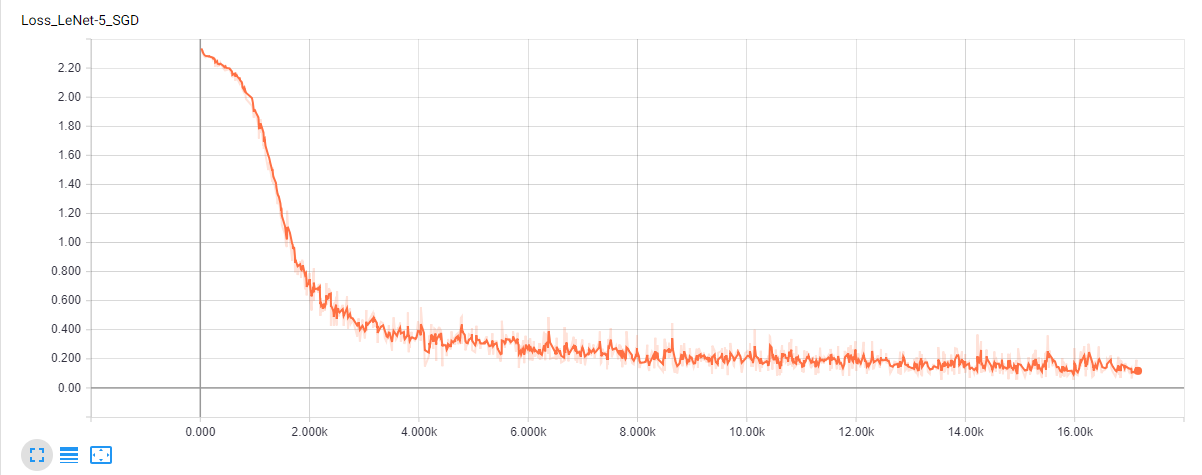

In [83]:
from IPython.display import Image
Image("loss_lenet_sgd.PNG")


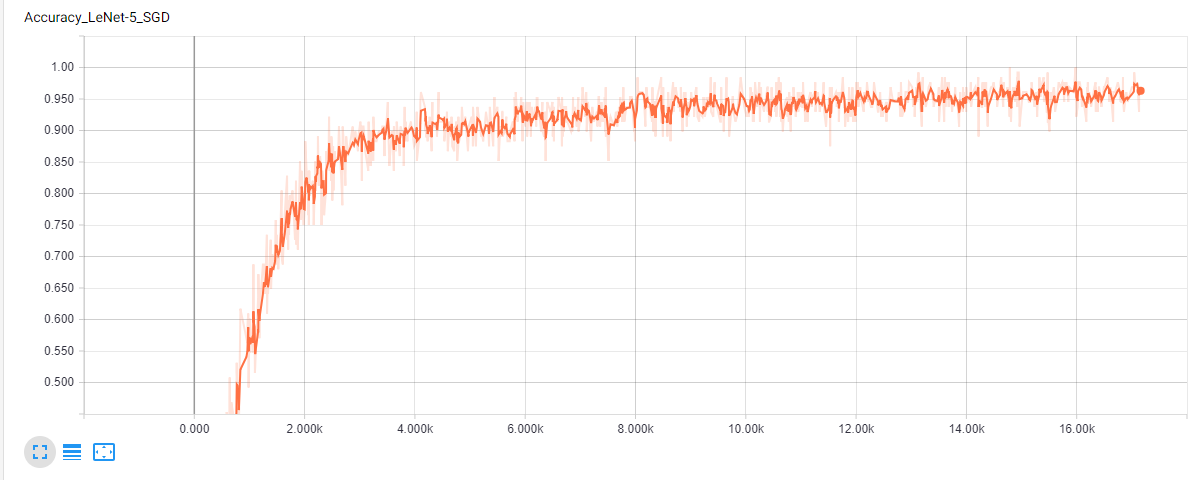

In [81]:
Image("acc_lenet_sgd.PNG")

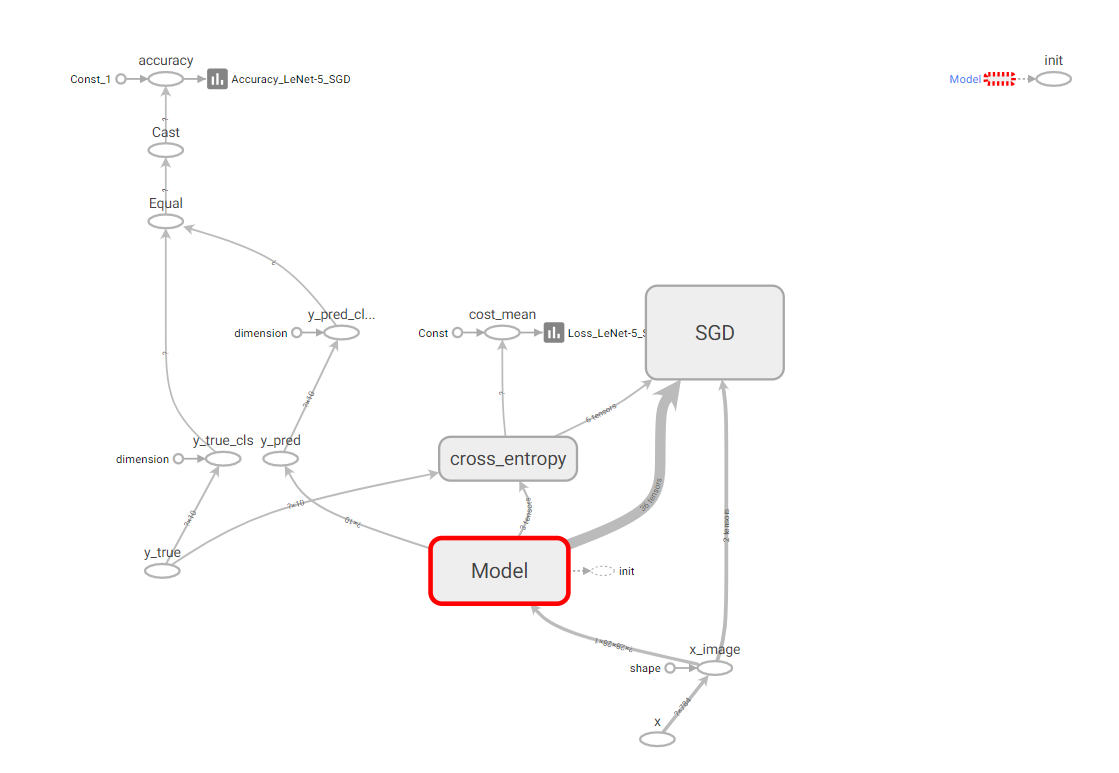

In [84]:
Image("model.PNG")

#### zoom into the different layers

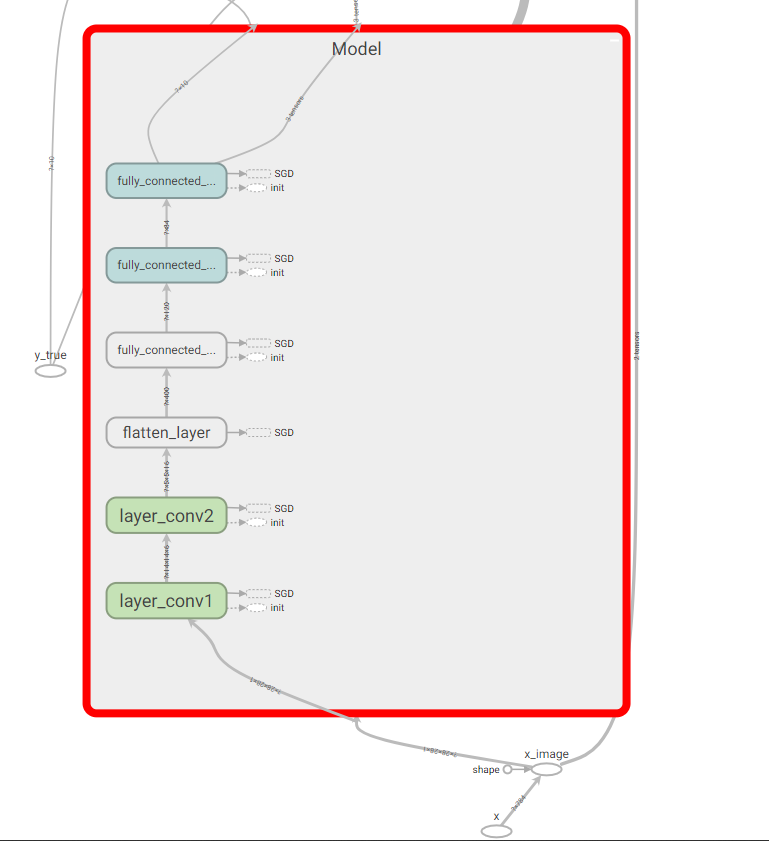

In [85]:
Image("detailed_model.PNG")


<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>

- Retrain your network with AdamOptimizer and then fill the table above:


| Optimizer            |  Gradient Descent  |    AdamOptimizer    |
|----------------------|--------------------|---------------------|
| Testing Accuracy     |         93.2%      |        98.8%        |       
| Training Time        |         405        |        357          |  

- Which optimizer gives the best accuracy on test data?

**Your answer:**
The Adam optimizer is better than the SGD since it has a higher test accuracy with lower execution time.
Note that both models were trained for 20 epochs . we tried to train the SGD for 100 epochs to see how much we would improve our results . we obtained 97.6 % accuracy. Note also that changing the hyperparameters is responsible for affecting the overall performance of the model and the accuracy of the predictions.


In [78]:
tf.reset_default_graph()
_,_,_,_,_,_,_,_,_,_ = train(training_epochs=20, display_step=1 ,optimizer=tf.train.AdamOptimizer)

conv layer 1 => done 

conv layer 2 => done 

flat layer  => done 

number of features 400
fc layer 1 => done 

fc layer 2 => done 

fc layer 3 => done 

Epoch:  01   =====> Loss= 0.316329955
Epoch:  02   =====> Loss= 0.091413136
Epoch:  03   =====> Loss= 0.063523906
Epoch:  04   =====> Loss= 0.050310816
Epoch:  05   =====> Loss= 0.041235423
Epoch:  06   =====> Loss= 0.033659826
Epoch:  07   =====> Loss= 0.028504752
Epoch:  08   =====> Loss= 0.023380800
Epoch:  09   =====> Loss= 0.020639333
Epoch:  10   =====> Loss= 0.018828832
Epoch:  11   =====> Loss= 0.016241496
Epoch:  12   =====> Loss= 0.014761868
Epoch:  13   =====> Loss= 0.013132545
Epoch:  14   =====> Loss= 0.013087625
Epoch:  15   =====> Loss= 0.011510319
Epoch:  16   =====> Loss= 0.010170439
Epoch:  17   =====> Loss= 0.009604747
Epoch:  18   =====> Loss= 0.008666824
Epoch:  19   =====> Loss= 0.008067237
Epoch:  20   =====> Loss= 0.007946154
Optimization Finished! 

Time elapsed: 357.0461206436157
Accuracy: 0.988


<b> Question 2.2.2</b> Try to add dropout (keep_prob = 0.75) before the first fully connected layer. You will use tf.nn.dropout for that purpose. What accuracy do you achieve on testing data?

**Accuracy achieved on testing data:** ...

In [73]:
tf.reset_default_graph()
_,_,_,_,_,_,_,_,_,_ = train(training_epochs=20, optimizer=tf.train.AdamOptimizer ,drop_out=True,prob=0.75)

conv layer 1 => done 

conv layer 2 => done 

flat layer  => done 

number of features 400
fc layer 1 => done 

fc layer 2 => done 

fc layer 3 => done 

Epoch:  01   =====> Loss= 0.374400873
Epoch:  02   =====> Loss= 0.113647406
Epoch:  03   =====> Loss= 0.079702710
Epoch:  04   =====> Loss= 0.065529708
Epoch:  05   =====> Loss= 0.054914680
Epoch:  06   =====> Loss= 0.047009358
Epoch:  07   =====> Loss= 0.041249778
Epoch:  08   =====> Loss= 0.037170852
Epoch:  09   =====> Loss= 0.033592899
Epoch:  10   =====> Loss= 0.030596543
Epoch:  11   =====> Loss= 0.027677399
Epoch:  12   =====> Loss= 0.024970964
Epoch:  13   =====> Loss= 0.021562504
Epoch:  14   =====> Loss= 0.021381183
Epoch:  15   =====> Loss= 0.019953504
Epoch:  16   =====> Loss= 0.020583838
Epoch:  17   =====> Loss= 0.018446996
Epoch:  18   =====> Loss= 0.015930455
Epoch:  19   =====> Loss= 0.016086008
Epoch:  20   =====> Loss= 0.015073655
Optimization Finished! 

Time elapsed: 413.7184979915619
Accuracy: 0.9857
